# 1. Import Python Packages

In [1]:
%matplotlib notebook
import sys
sys.path.insert(1,'/global/project/projectdirs/metatlas/anaconda/lib/python2.7/site-packages' )

from metatlas.helpers import metatlas_get_data_helper_fun as ma_data
import metatlas.metatlas_objects as metob

import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

('Metatlas live in ', '/global/project/projectdirs/metatlas/anaconda/lib/python2.7/site-packages/metatlas')
you're running on mndlhm0203 at 10.36.162.159 


In [2]:
my_file = metob.retrieve('Lcmsrun',name='20150910%_WT_%Run61%',username='*')[-1]

In [3]:
df_container = ma_data.df_container_from_metatlas_file(my_file)


In [4]:
print df_container.keys()
df = df_container['ms2_neg']
df = df[abs(df.rt-7.495)<0.001]
df.sort_values('i',axis=0,ascending=False,inplace=True)
df.head()


['ms1_pos', 'ms2_neg', 'ms2_pos', 'ms1_neg']


/global/project/projectdirs/metatlas/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,mz,i,rt,precursor_MZ,precursor_intensity,collision_energy
45956,392.272003,3.666669e+06,7.49546,392.272034,5079225.5,20.0
45955,377.248199,1.919126e+06,7.49546,392.272034,5079225.5,20.0
45943,236.083069,2.674115e+05,7.49546,392.272034,5079225.5,20.0
45944,237.090897,6.987196e+04,7.49546,392.272034,5079225.5,20.0
45945,250.099396,6.263963e+04,7.49546,392.272034,5079225.5,20.0


<IPython.core.display.Javascript object>


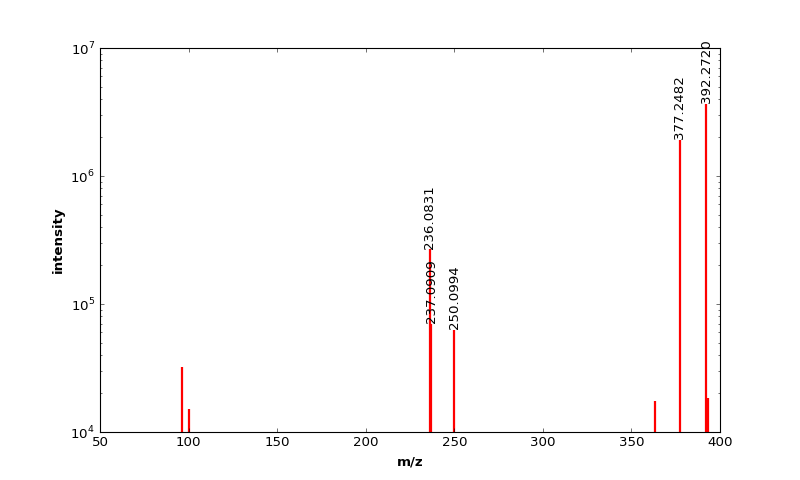

(10000.0, 10000000.0)

In [5]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

ax.set_xlabel('m/z',fontsize=12,weight='bold')
ax.set_ylabel('intensity',fontsize=12,weight='bold')

ax.vlines(df['mz'],np.zeros(len(df['mz'])),df['i'],colors='r',linewidth = 2)
labels = [1.001e9]
for i,row in df.iterrows():
     if np.min(np.abs(row.mz - labels)) > 0.1 and row.i > 0.01 * df.i.max():
        ax.annotate('%.4f'%row.mz, xy=(row.mz, 1.01*row.i),rotation = 90, horizontalalignment = 'center', verticalalignment = 'left')
        labels.append(row.mz)

# plt.axhline()
# plt.tight_layout()
# L = plt.ylim()
ax.set_yscale('log')
plt.ylim(1e4,1e7)


